In [1]:
source('../../functions.R')
seurat =readRDS('Data/periphery.RDS')
setwd('Figures/Figure 6')

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.5.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix
Warning message:
"package 'feather' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: viridisLite
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Attaching package: 'tidyr'

The following object

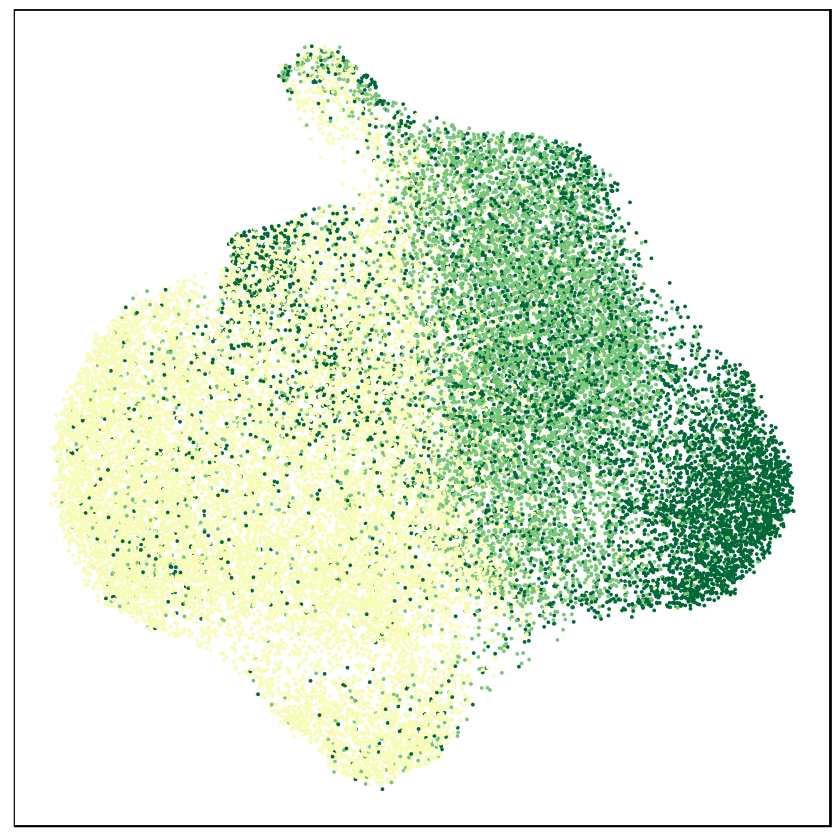

In [2]:
seurat = addUMAP(seurat)
data = seurat@meta.data
set.seed(1)
data = data[sample(rownames(data), length(rownames(data))),]
palette = brewer.pal(9, 'YlGn')[c(2, 5, 8)]

ggplot(data, aes(x = UMAP1, y = UMAP2, color = Fraction)) + geom_point(size = .01) + Axis_themes + UMAP_theme + scale_color_manual(values = palette)
ggsave('condition_umap.pdf', height = 2, width = 2, useDingbats = FALSE)

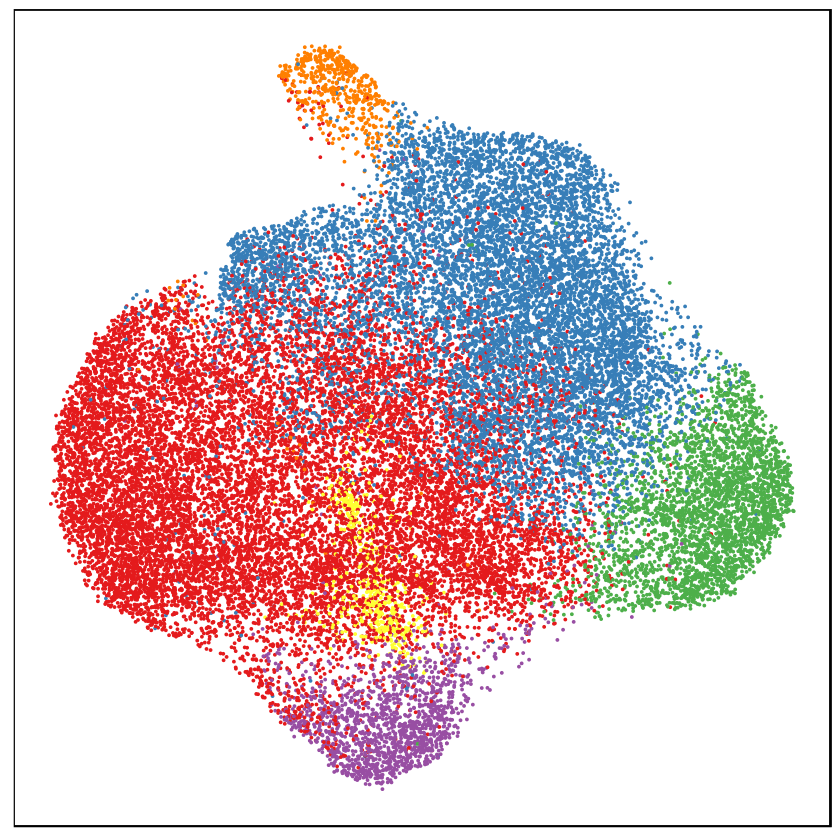

In [3]:
data = seurat@meta.data
data = data[sample(rownames(data), length(rownames(data))),]
ggplot(data, aes(x = UMAP1, y = UMAP2, color = factor(res.0.15))) + geom_point(size = .01) + scale_color_brewer(palette = 'Set1') + UMAP_theme
ggsave('cluster_umap.pdf', height = 2, width = 2, useDingbats = FALSE)

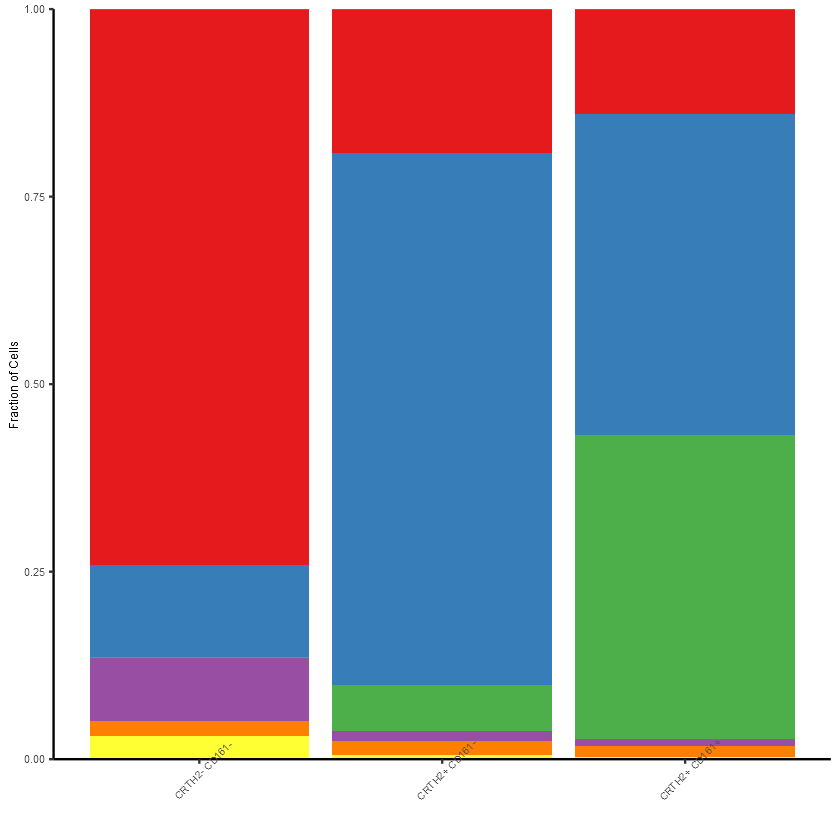

In [4]:
ggplot(seurat@meta.data, aes(x = Fraction, fill = res.0.15)) + geom_bar(position = 'fill') +scale_fill_manual(values = brewer.pal(8, 'Set1')) + 
remove_grid + Axis_themes + labs(y = 'Fraction of Cells') + theme(axis.title.x = element_blank()) + guides(fill = FALSE) + theme(axis.text.x = element_text(angle = 45, vjust =1)) + 
scale_y_continuous(expand = c(0,0)) +
theme(panel.border = element_blank(), axis.line = element_line(color = 'black'))
ggsave('stackedbar.pdf', height =2.3, width = 1.5)

In [5]:
esot = readRDS('../../Data/tcell_e.RDS')
esot@meta.data$res.0.3 = esot@meta.data$pheno
allt = MergeSeurat(seurat, esot)

In [6]:
allt@meta.data$pheno = NA
allt@meta.data[seurat@cell.names, 'pheno'] =seurat@meta.data$res.0.15
allt@meta.data$pheno[allt@meta.data$pheno == 1] = '1 (convTh2)'
allt@meta.data$pheno[allt@meta.data$pheno == 2] = '2 (peTh2)'

allt@meta.data[esot@cell.names, 'pheno'] = esot@meta.data$pheno
table(allt@meta.data$pheno)


          0 1 (convTh2)   2 (peTh2)           3           4           5 
      14543       10243        3189        1549         570         541 
         NK       peTh2        Th17        Treg         Trm 
        387         236         347         486        2967 

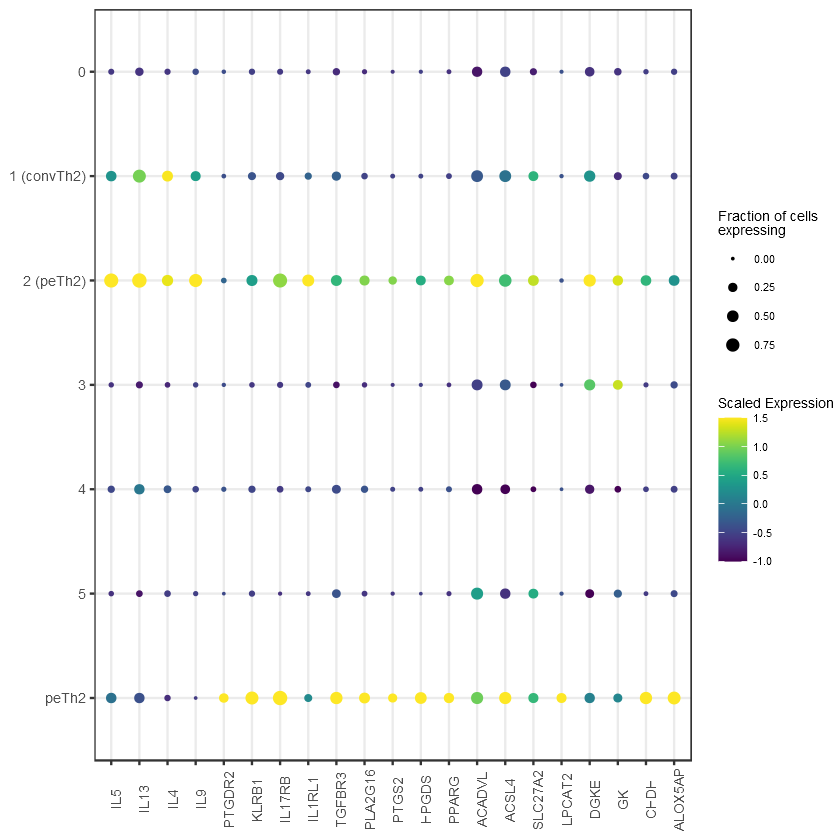

In [7]:
genes = c("IL5", 'IL13', 'IL4', 'IL9', 'PTGDR2', 'KLRB1', 'IL17RB', 'IL1RL1','TGFBR3','PLA2G16', 'PTGS2',  'HPGDS','PPARG','ACADVL', 'ACSL4','SLC27A2', 'LPCAT2','DGKE', 'GK','CHDH', 'ALOX5AP')
# Panel 3: phenotype of eosinophils and neutrophils
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}

data = as.data.frame(t(as.matrix(allt@data[genes,])))
data$phenotype = allt@meta.data$pheno
data = data %>% filter(!data$phenotype %in% c('Th17', 'Treg', 'NK', 'Trm'))
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
keep = df_exp
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1.5] = 1.5
df_exp$value[df_exp$value < -1]= -1
df_exp$pct = df_pct$value
df_exp$value = as.vector(df_exp$value)
#df_exp$value[is.nan(df_exp$value)] = 0

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 

 theme_bw()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + 
labs(color = "Scaled Expression", size = 'Fraction of cells\nexpressing') + scale_x_discrete(limits = genes) + Axis_themes + 
theme(axis.title = element_blank(), axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8))+ scale_y_discrete(limits = rev(c(0, '1 (convTh2)', '2 (peTh2)', '3', '4', '5', 'peTh2'))) + 
 scale_size_continuous(range = c(0, 3))
ggsave('peth2markers.pdf', height = 2, width = 4.5, useDingbats = FALSE)

patient,CRTH2.CD161.,CRTH2.CD161..1,diag,CRTH2.CD161.GPR15.,CRTH2.CD161.GPR15..1,CRTH2.CD161.GPR15..2,var3
451,1.76,1.57,active,0.000,0.01300,0.088,0.13816
468,0.60,0.88,remission,0.091,0.02800,0.280,0.24640
354,0.79,1.83,active,1.760,0.04800,0.980,1.79340
355,0.53,0.38,remission,0.180,0.02200,0.990,0.37620
292,1.54,0.83,active,0.000,0.01200,0.190,0.15770
392,0.30,0.16,remission,0.120,0.00799,0.340,0.05440


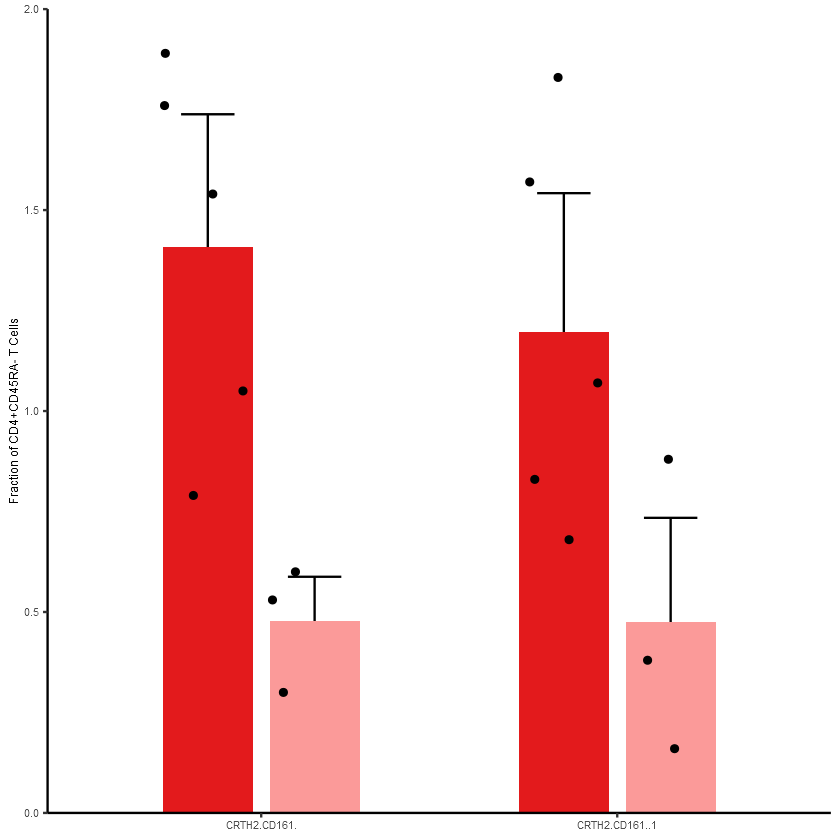

In [8]:
data=  read.csv('sortdata.csv', header = 1)
data$var3 = data$CRTH2.CD161..1 * data$CRTH2.CD161.GPR15..2
head(data)

data = melt(data, id = c('diag', 'patient')) %>% filter(variable %in% c('CRTH2.CD161.', 'CRTH2.CD161..1'))
mean = data %>% group_by(diag, variable) %>% summarize(mean = mean(value), sd = sd(value)/sqrt(2)) #%>% mutate(sd = sd/sqrt(2))
ggplot(mean, aes(x = variable, y = mean,group = diag, fill = diag)) + geom_errorbar(aes(ymin = mean-sd, ymax = mean+sd),position = position_dodge(width = .6), width = .3) +
geom_col(position = position_dodge(width = .6), width = .5) +
geom_point(data = data, aes(x = variable, y = value, group = diag), position = position_jitterdodge(dodge.width = .6, jitter.width = .5))+ 
remove_grid + Axis_themes + theme(panel.border = element_blank(), axis.line = element_line(color = 'black'), axis.title.x = element_blank()) + 
scale_y_continuous(expand = c(0,0),
                     limits = c(0,2)) +
scale_fill_manual(values = c('#E31A1C', '#FB9A99')) + 
guides(fill = FALSE) + labs( y = 'Fraction of CD4+CD45RA- T Cells')
#ggsave('sortplot.pdf', height = 2.2, width = 2.4, useDingbats = FALSE)

In [9]:
a = data %>% filter(variable == 'CRTH2.CD161.')
a$diag = factor(a$diag)
wilcox.test(value~diag, data = a, alternative = 'greater')


	Wilcoxon rank sum test

data:  value by diag
W = 15, p-value = 0.01786
alternative hypothesis: true location shift is greater than 0


In [10]:
a = data %>% filter(variable == 'CRTH2.CD161..1')
a$diag = factor(a$diag)
wilcox.test(value~diag, data = a, alternative = 'greater')


	Wilcoxon rank sum test

data:  value by diag
W = 13, p-value = 0.07143
alternative hypothesis: true location shift is greater than 0


In [11]:
seurat = SetAllIdent(seurat, 
                    'res.0.15')
#markers.all = FindAllMarkers(seurat, test.use = 'wilcox', logfc.threshold = 0)
#saveRDS(markers.all, 'markers.all.RDS')
markers.all = readRDS('markers.all.RDS')

In [12]:
seurat = SetAllIdent(seurat, 'Fraction')
#markers.fraction = FindAllMarkers(seurat, test.use = 'wilcox', logfc.threshold = 0)
markers.fraction = readRDS('markers.fraction.RDS')

In [13]:
write.csv(markers.all, 'cluster_markers.csv')
write.csv(markers.fraction, 'fraction_markers.csv')